# Tech Challenge - Fase 3

Aluno: Nícolas Soares Telles 

## 📌 Descrição do Desafio


Este projeto tem como objetivo analisar o comportamento da população durante a pandemia da COVID-19, utilizando os microdados da **PNAD-COVID19** do IBGE. O foco é identificar indicadores relevantes que possam auxiliar um grande hospital no planejamento de ações em caso de novos surtos da doença.


## 📊 Estruturação do Banco de Dados

Os dados foram organizados no **Google BigQuery**, permitindo análises eficientes e escaláveis. A modelagem do banco seguiu os seguintes princípios:

- Seleção de **20 perguntas** da pesquisa PNAD-COVID19, conforme os requisitos do desafio.

- **Limitação de 3 meses de dados** para manter a análise focada e gerenciável.

> Maio, Junho e Julho


- Criação de tabelas otimizadas para facilitar consultas e agregações.

## ❓ Perguntas Selecionadas

Foram escolhidas 20 perguntas, divididas em três categorias principais:

### **1️⃣ Caracterização dos sintomas clínicos da população**

- **B1** – Sintomas apresentados na semana anterior.

- **B2** – Busca por atendimento médico. (Por causa disso, foi a algum estabelecimento de saude?)

- **B3** – Medidas tomadas para recuperação.

- **B4** – Locais de atendimento procurados.

- **B5** – Necessidade de internação.

- **B6** – Necessidade de ventilação mecânica/intubação.

- **B7** – Possui plano de saúde?

  

### **2️⃣ Comportamento da população na época da COVID-19**

- **C1** – Trabalhou na semana passada?

- **C2** – Estava afastado do trabalho?

- **C13** – Trabalhou em home office?

  

### **3️⃣ Características econômicas da sociedade**

- **C7** – Tipo de ocupação (empregado, autônomo, empresário etc.).

- **C14** – Contribuição para o INSS.

- **D1e** – Recebeu auxílio emergencial?


In [91]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import warnings
import logging
warnings.filterwarnings("ignore")
logging.getLogger("matplotlib").setLevel(logging.WARNING)
logging.getLogger("seaborn").setLevel(logging.WARNING)
pd.set_option("display.max_columns", None)

In [77]:
df = pd.read_csv('../data/processed/df_merge.csv')
df_faixa_salarial = pd.read_csv('../data/processed/faixa_salarial.csv')
df_ocupacao = pd.read_csv('../data/processed/ocupacao.csv')

In [129]:
def plot_line_chart(df, column, title, x_label, y_label, figsize = (10, 5)):
    # Criando um dicionário para mapear os meses
    month_map = { 5: 'Maio', 6: 'Junho',7: 'Julho', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'}
    
    # Criando a coluna de nomes dos meses
    df['MES_NOME'] = df['MES'].map(month_map)
    
    # Configurando o estilo do gráfico
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=figsize)
    
    # Criando o gráfico de linha
    ax = sns.lineplot(data=df, x='MES_NOME', y=column, marker='o', color='#1f77b4', linewidth=2.5)
    
    # Ajustando o ticker do eixo Y para formato de milhar
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(',', '.')))
    
    # Adicionando rótulos arredondados nos pontos
    # Adicionando rótulos arredondados nos pontos
    for i, row in df.iterrows():
        plt.text(row['MES_NOME'], row[column] * 1.005, 
                #  f'{int(row[column]/1000)}k',
                 int(row[column]),
                 ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
    
    # Definindo títulos e rótulos
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    
    # Exibindo o gráfico
    plt.show()

In [25]:
def plot_multiple_lines(df, columns, title, x_label, y_label, figsize=(10, 5)):
    # Criando um dicionário para mapear os meses
    month_map = {5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'}
    
    # Criando a coluna de nomes dos meses
    df['MES_NOME'] = df['MES'].map(month_map)
    
    # Configurando o estilo do gráfico
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=figsize)
    
    # Criando o gráfico de linhas para múltiplas colunas
    palette = sns.color_palette("husl", len(columns))  # Paleta de cores dinâmica
    
    for i, column in enumerate(columns):
        ax = sns.lineplot(data=df, x='MES_NOME', y=column, marker='o', linewidth=2.5, label=column, color=palette[i])
        
        # Adicionando rótulos arredondados nos pontos
        for j, row in df.iterrows():
            plt.text(row['MES_NOME'], row[column] * 1.02, f'{int(row[column]/1000)}k',
                     ha='center', va='bottom', fontsize=10, color=palette[i], fontweight='bold')
    
    # Ajustando o ticker do eixo Y para formato de milhar com 'k'
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k' if x >= 1000 else f'{int(x)}'))
    
    # Definindo títulos e rótulos
 
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend(title="Legenda")
    
    # Exibindo o gráfico
    plt.show()

In [72]:
def plot_multiple_lines_perc(df, columns, title, x_label, y_label, figsize=(10, 5), y_lim=(25, 60)):
    # Criando um dicionário para mapear os meses
    month_map = {5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'}
    
    # Criando a coluna de nomes dos meses
    df['MES_NOME'] = df['MES'].map(month_map)
    
    # Configurando o estilo do gráfico
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=figsize)
    
    # Definindo a paleta de cores
    if len(columns) == 1:
        palette = ['red']  # Se houver apenas uma coluna, a cor será vermelha
    else:
        palette = sns.color_palette("pastel", len(columns))  # Caso contrário, usa a paleta dinâmica
    
    # Criando o gráfico de linhas para múltiplas colunas
    for i, column in enumerate(columns):
        ax = sns.lineplot(data=df, x='MES_NOME', y=column, marker='o', linewidth=1.3, label=column, color=palette[i])
        
        # Adicionando rótulos arredondados nos pontos em formato de porcentagem
        for j, row in df.iterrows():
            plt.text(row['MES_NOME'], row[column] * 1.02, f'{row[column]:.2f}%',
                     ha='center', va='bottom', fontsize=10, color=palette[i], fontweight='bold')
    
    # Ajustando o ticker do eixo Y para formato de porcentagem xx.xx%
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}%'))
    plt.ylim(y_lim)
    
    # Definindo títulos e rótulos
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend(title="Legenda")
    
    # Exibindo o gráfico
    plt.show()

In [20]:
def plot_multiple_bars(df, columns, title, x_label, y_label, figsize=(10, 5), legend_loc='lower right'):
    # Criando um dicionário para mapear os meses
    month_map = {5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'}
    
    # Criando a coluna de nomes dos meses
    df['MES_NOME'] = df['MES'].map(month_map)
    
    # Configurando o estilo do gráfico
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=figsize)
    
    # Criando o gráfico de barras para múltiplas colunas
    palette = sns.color_palette("pastel", len(columns))  # Paleta de cores dinâmica
    width = 0.2  # Largura das barras
    x = range(len(df))  # Posições no eixo X
    
    for i, column in enumerate(columns):
        plt.bar([pos + i * width for pos in x], df[column], width=width, label=column, color=palette[i])
        
        # Adicionando rótulos arredondados nos pontos
        for j, row in df.iterrows():
            plt.text(j + i * width, row[column] * 1.0005, f'{int(row[column]/1000)}k',
                     ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
    
    # Ajustando o eixo X
    plt.xticks([pos + (len(columns) - 1) * width / 2 for pos in x], df['MES_NOME'])
    
    # Ajustando o ticker do eixo Y para formato de milhar com 'k'
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k' if x >= 1000 else f'{int(x)}'))
    
    # Definindo títulos e rótulos
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend(title="Legenda", loc=legend_loc)
    # Exibindo o gráfico
    plt.show()

In [59]:
def plot_horizontal_bar_chart(df, column_name, column, title, x_label, y_label, figsize=(10, 5)):
    # Ordenando os dados da maior para a menor
    df = df.sort_values(by=column, ascending=False)
    df = df.head(10)
    
    # Configurando o estilo do gráfico
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=figsize)
    
    # Criando o gráfico de barras horizontais com uma única cor azul
    bars = plt.barh(df[column_name], df[column], color='#1f77b4')
        
    # Ajustando o ticker do eixo X para formato de porcentagem xx.xx%
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(',', '.')))
    plt.gca().invert_yaxis()  # Inverter o eixo Y para que os maiores valores fiquem no topo
    
    # Definindo títulos e rótulos
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    
    # Exibindo o gráfico
    plt.show()

In [7]:
df = df.sort_values(by = 'MES')

## Quantidade de Entrevistados

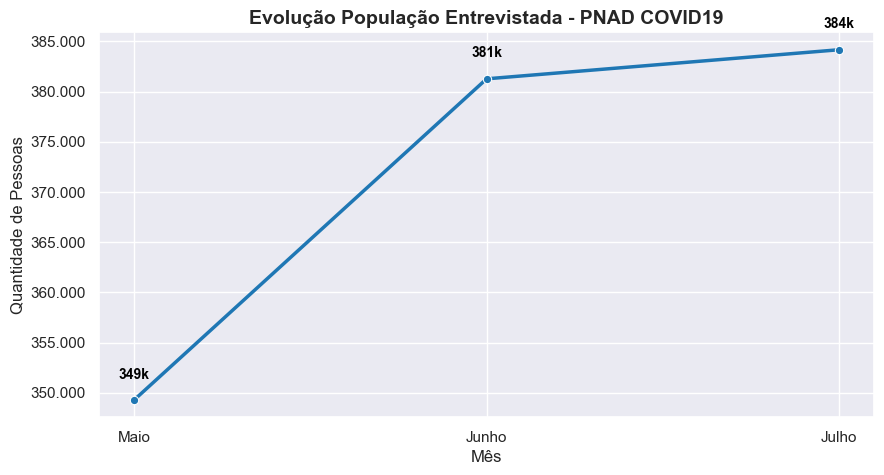

In [8]:
plot_line_chart(df, 
                    column='qtd_populacao_entrevistada', 
                    title = 'Evolução População Entrevistada - PNAD COVID19',
                    x_label = 'Mês',
                    y_label = 'Quantidade de Pessoas'
                    )

In [9]:
df.qtd_populacao_entrevistada.sum()

1114742

## Visão Econômica

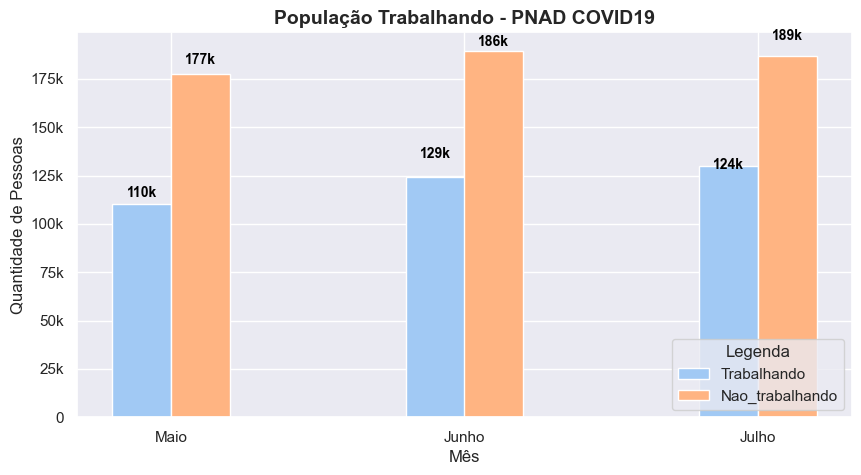

In [10]:
plot_multiple_bars(df, 
                    columns=['Trabalhando', 'Nao_trabalhando'], 
                    title = 'População Trabalhando - PNAD COVID19',
                    x_label = 'Mês',
                    y_label = 'Quantidade de Pessoas'
                    )

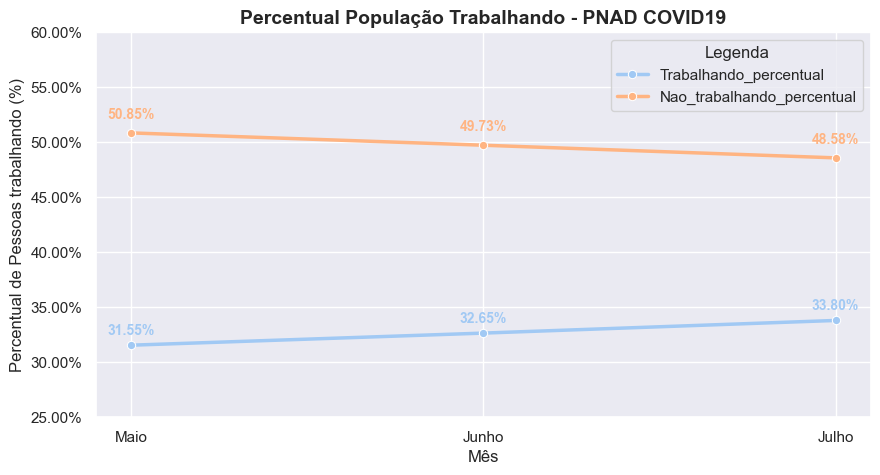

In [28]:
plot_multiple_lines_perc(df, 
                    columns=['Trabalhando_percentual',	'Nao_trabalhando_percentual'],
                    title = 'Percentual População Trabalhando - PNAD COVID19',
                    x_label = 'Mês',
                    y_label = 'Percentual de Pessoas trabalhando (%)'
                    )

## Analise Salarial

In [80]:
df_faixa_salarial['faixa_salarial'] = df_faixa_salarial['MinSalario'].astype(str) + '-' + df_faixa_salarial['MaxSalario'].astype(str)

In [86]:
df_faixa_salarial = df_faixa_salarial.groupby('faixa_salarial').qtd.sum().reset_index().sort_values(by = 'qtd', ascending=False)

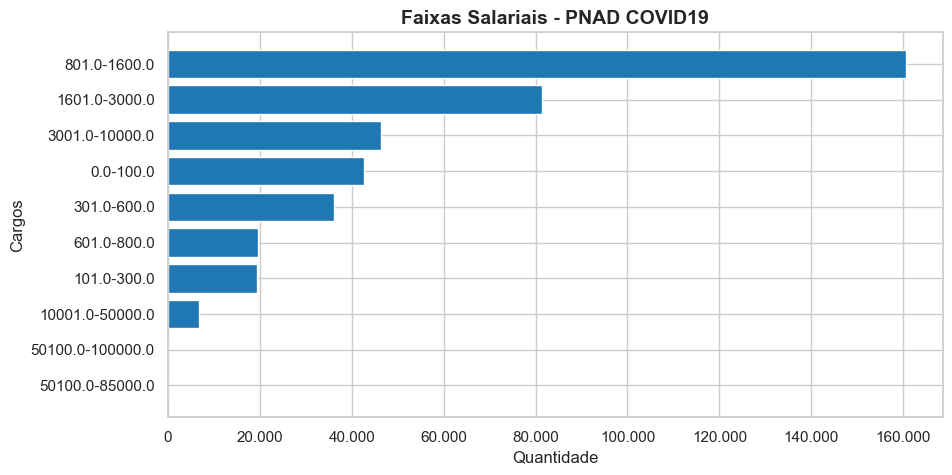

In [87]:
plot_horizontal_bar_chart(df = df_faixa_salarial, 
                          column_name = 'faixa_salarial',
                          column='qtd', title = 'Faixas Salariais - PNAD COVID19', x_label= 'Quantidade', y_label='Cargos')

## Cargos

In [ ]:
df_ocupacao = df_ocupacao.groupby('cargo').qtd_populacao_entrevistada.sum().reset_index(name = 'Quantidade')

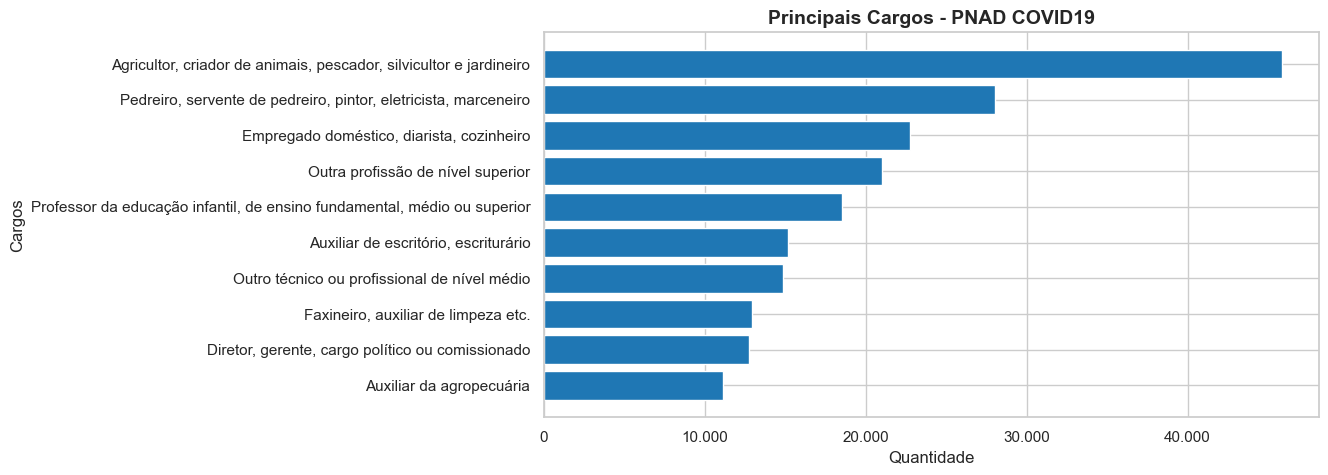

In [61]:
plot_horizontal_bar_chart(df = df_ocupacao, 
                          column_name = 'cargo',
                          column='Quantidade', title = 'Principais Cargos - PNAD COVID19', x_label= 'Quantidade', y_label='Cargos')

## Internações

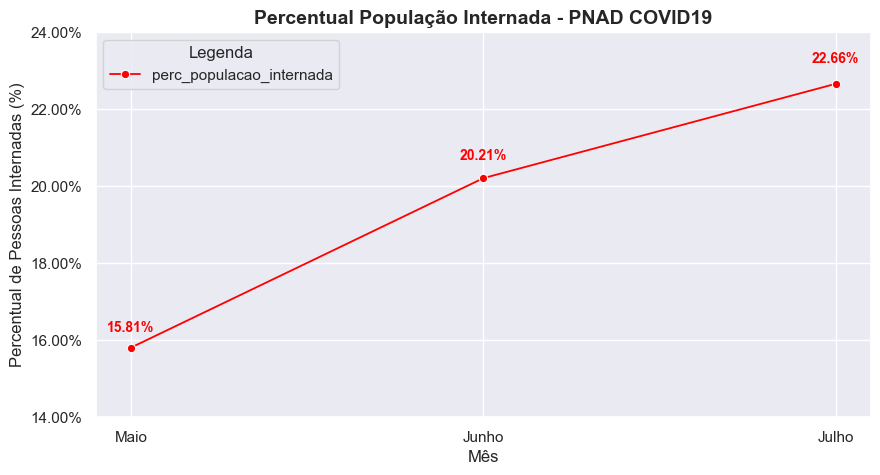

In [75]:
plot_multiple_lines_perc(df, 
                    columns=['perc_populacao_internada'],
                    title = 'Percentual População Internada - PNAD COVID19',
                    x_label = 'Mês',
                    y_label = 'Percentual de Pessoas Internadas (%)',
                    y_lim=(14,24)
                    )

## Sintomas

In [89]:
# Mapear os nomes originais dos sintomas para os novos nomes
sintomas = {
    'Febre': 'Febre',
    'Tosse': 'Tosse',
    'Dor_de_garganta': 'Dor de Garganta',
    'Dificuldade_para_respirar': 'Dific. Respirar',
    'Dor_de_cabeca': 'Dor de Cabeça',
    'Dor_no_peito': 'Dor no Peito',
    'Nausea_enjoo': 'Náusea',
    'Nariz_entupido_ou_escorrendo': 'Nariz Escorrendo',
    'Fadiga_cansaço': 'Fadiga',
    'Dor_nos_olhos': 'Dor nos Olhos',
    'Perda_de_cheiro_ou_de_sabor': 'Perda de Olfato/Paladar',
    'Dor_muscular_dor_no_corpo': 'Dor no Corpo',
    'Diarreia': 'Diarreia'
}

In [90]:
#  Renomear as colunas do DataFrame com os novos nomes dos sintomas
df.rename(columns=sintomas, inplace=True)

In [98]:
sintomas_lista = ['Febre'	, 'Tosse', 
'Dor de Garganta',	
'Dific. Respirar',
'Dor de Cabeça',
'Dor no Peito',
'Náusea', 
'Nariz Escorrendo',
'Fadiga_cansaco',
'Dor nos Olhos',
'Perda de Olfato/Paladar',
'Dor no Corpo',
'Diarreia']

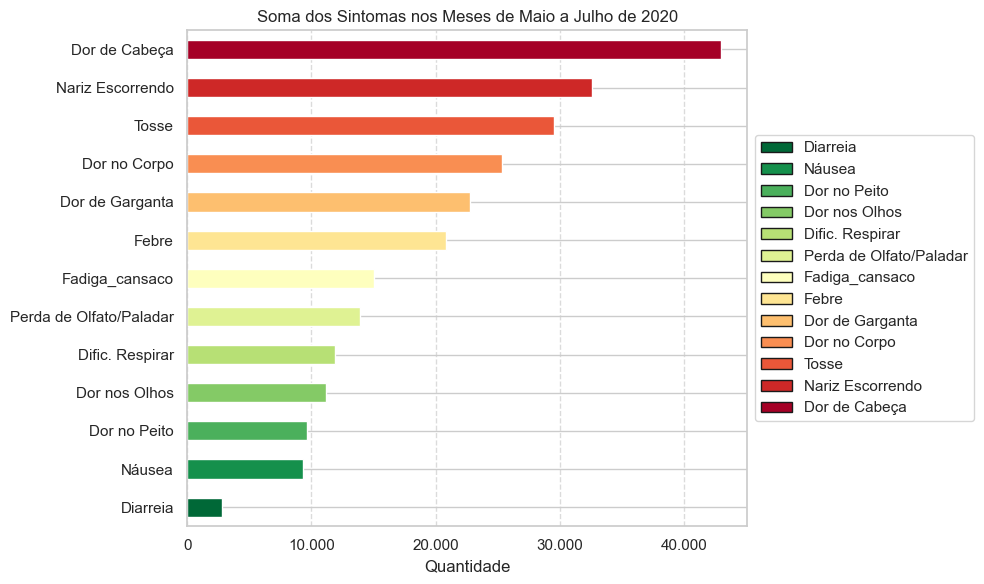

In [ ]:
# Calcular a soma dos sintomas para cada mês
soma_sintomas_por_mes = df[sintomas_lista].sum()
# Ordenar os sintomas de forma crescente
soma_sintomas_por_mes = soma_sintomas_por_mes.sort_values()

# Criar um mapa de cores do Matplotlib do vermelho para o verde
cores = plt.cm.RdYlGn(np.linspace(1, 0, len(soma_sintomas_por_mes)))

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
grafico = soma_sintomas_por_mes.plot(kind='barh', color=cores)
plt.title('Soma dos Sintomas nos Meses de Maio a Julho de 2020')
plt.xlabel('Quantidade')
plt.ylabel('')

# Adicionar a legenda com os nomes dos sintomas e suas respectivas cores
handles = [plt.Rectangle((0,0),1,1, color=cores[i], ec="k") for i in range(len(sintomas))]
plt.legend(handles, soma_sintomas_por_mes.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(',', '.')))

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Configura a grade no eixo X
plt.tight_layout()
plt.show()

## Locais de Internação

In [107]:
locais_internacao = [
    'Posto_de_saude_outros',
    'PS_SUS_UPA',
    'Hospital_SUS',
    'Ambulatorio_forcas_armadas',
    'PS_forcas_armadas',
    'Hospital_forcas_armadas',]


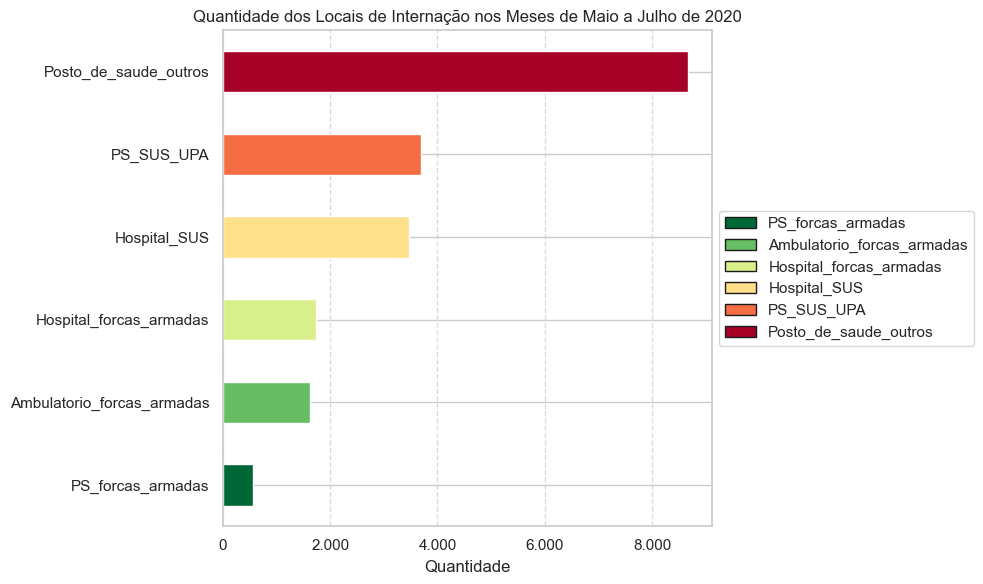

In [110]:
# Calcular a soma dos sintomas para cada mês
soma_locais_internacao = df[locais_internacao].sum()
# Ordenar os sintomas de forma crescente
soma_locais_internacao = soma_locais_internacao.sort_values()

# Criar um mapa de cores do Matplotlib do vermelho para o verde
cores = plt.cm.RdYlGn(np.linspace(1, 0, len(soma_locais_internacao)))

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
grafico = soma_locais_internacao.plot(kind='barh', color=cores)
plt.title('Quantidade dos Locais de Internação nos Meses de Maio a Julho de 2020')
plt.xlabel('Quantidade')
plt.ylabel('')

# Adicionar a legenda com os nomes dos sintomas e suas respectivas cores
handles = [plt.Rectangle((0,0),1,1, color=cores[i], ec="k") for i in range(len(locais_internacao))]
plt.legend(handles, soma_locais_internacao.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(',', '.')))

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Configura a grade no eixo X
plt.tight_layout()
plt.show()

## Sem Atendimentos

In [113]:
# Calcular a soma da população não atendida para cada mês
soma_populacao_nao_atendida_por_mes = df.groupby('MES')['qtd_populacao_nao_atendida'].sum().reset_index(name = 'qtd')

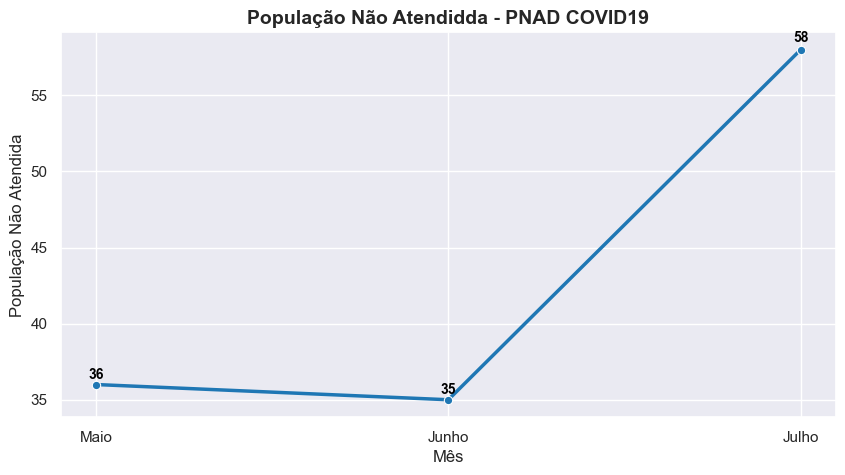

In [131]:
plot_line_chart(soma_populacao_nao_atendida_por_mes, 
                    column='qtd',
                    title =  'População Não Atendidda - PNAD COVID19',
                    x_label = 'Mês',
                    y_label = 'População Não Atendida'
                    )

# População Não Buscou Atendimento

In [137]:
# Calcular a soma da população não atendida para cada mês
soma_nao_busca_atendimento_medico= df.groupby('MES')['qtd_nao_busca_atendimento_medico'].sum().reset_index(name = 'qtd')
soma_nao_busca_atendimento_medico

,MES,qtd
0,5,1545
1,6,1468
2,7,2465


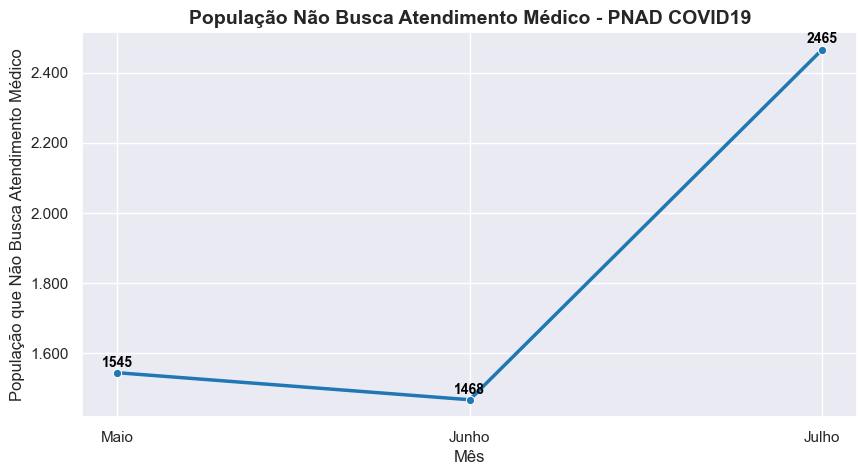

In [138]:
plot_line_chart(soma_nao_busca_atendimento_medico, 
                    column='qtd',
                    title =  'População Não Busca Atendimento Médico - PNAD COVID19',
                    x_label = 'Mês',
                    y_label = 'População que Não Busca Atendimento Médico'
                    )

## Respiração Artificial

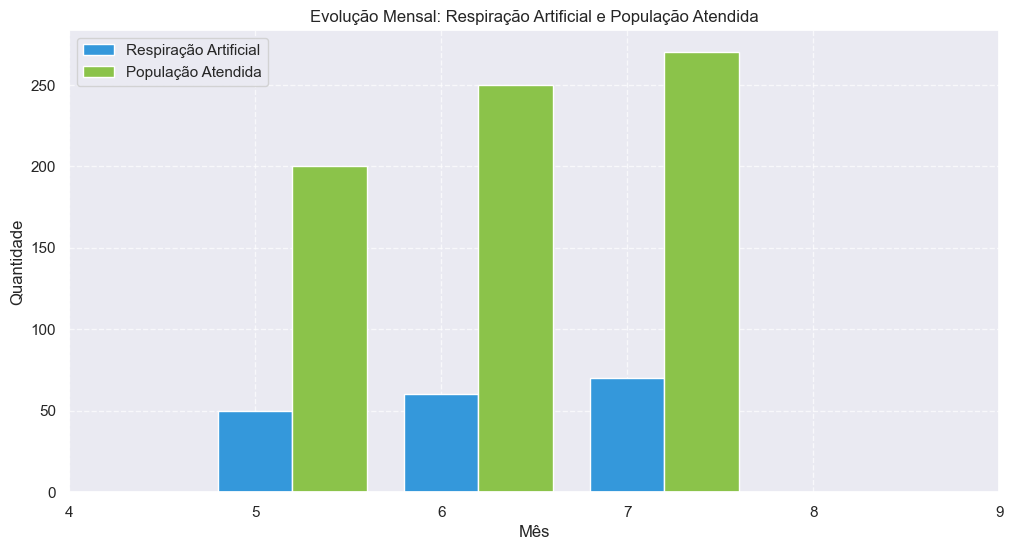

In [147]:
# Criar figura e eixos
plt.figure(figsize=(12, 6))

# Dados fictícios para simular o gráfico
meses = [5, 6, 7]
qtd_respiracao_artificial = [50, 60, 70]
qtd_populacao_atendida = [200, 250, 270]

# Ajustar espaçamento entre as barras
bar_width = 0.4

# Plotar gráfico de barras para qtd_respiracao_artificial
plt.bar(meses, qtd_respiracao_artificial, color='#3498db', label='Respiração Artificial', width=bar_width)

# Plotar gráfico de barras para qtd_populacao_atendida com uma posição x deslocada para a direita
plt.bar(np.array(meses) + bar_width, qtd_populacao_atendida, color='#8bc34a', label='População Atendida', width=bar_width)

# Adicionar título e rótulos
plt.title('Evolução Mensal: Respiração Artificial e População Atendida')
plt.xlabel('Mês')
plt.ylabel('Quantidade')

# Adicionar legenda
plt.legend(loc='upper left')

# Adicionar grade de fundo
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar os limites do eixo x para melhor visualização
plt.xlim(min(meses) - 1, max(meses) + 2)

# Exibir gráfico
plt.show()

## Plano de Saúde

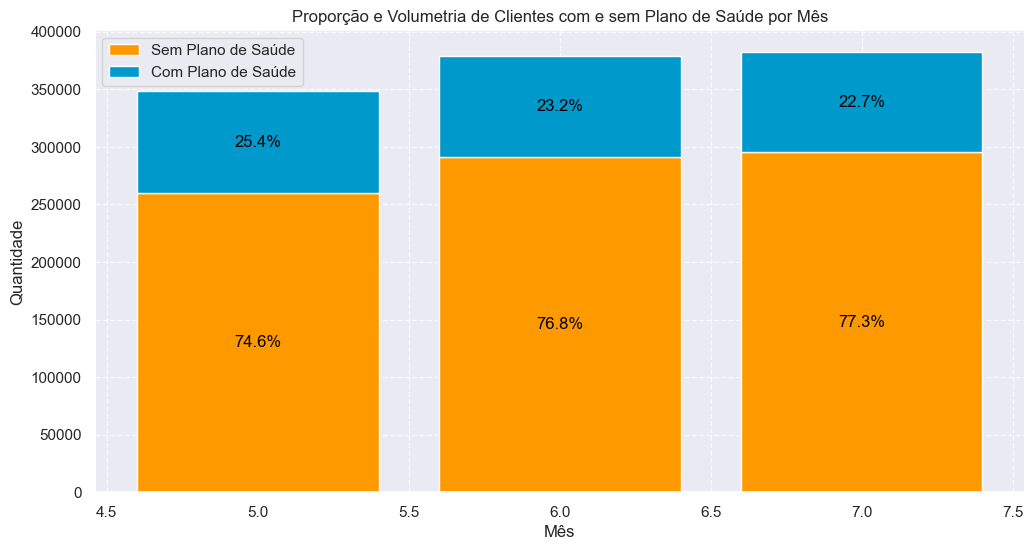

Mês 5:
  - Com Plano de Saúde: 25.39%
  - Sem Plano de Saúde: 74.61%
Mês 7:
  - Com Plano de Saúde: 22.73%
  - Sem Plano de Saúde: 77.27%
Mês 6:
  - Com Plano de Saúde: 23.21%
  - Sem Plano de Saúde: 76.79%


In [154]:
meses = df['MES']
qtd_com_plano_saude = df['qtd_com_plano_saude']
qtd_sem_plano_saude = df['qtd_sem_plano_saude']

# Criar figura e eixos
plt.figure(figsize=(12, 6))

# Plotar gráfico de barras empilhadas
plt.bar(meses, qtd_sem_plano_saude, color='#ff9900', label='Sem Plano de Saúde')
plt.bar(meses, qtd_com_plano_saude, bottom=qtd_sem_plano_saude, color='#0099cc', label='Com Plano de Saúde')

# Adicionar rótulos nas barras com percentuais
for i in range(len(meses)):
    total = qtd_com_plano_saude[i] + qtd_sem_plano_saude[i]
    
    # Cálculo dos percentuais
    percent_sem_plano = (qtd_sem_plano_saude[i] / total) * 100 if total > 0 else 0
    percent_com_plano = (qtd_com_plano_saude[i] / total) * 100 if total > 0 else 0
    
    # Posicionamento dos rótulos
    plt.text(meses[i], qtd_sem_plano_saude[i] / 2, f"{percent_sem_plano:.1f}%", ha='center', va='center', color='black')
    plt.text(meses[i], qtd_sem_plano_saude[i] + (qtd_com_plano_saude[i] / 2), f"{percent_com_plano:.1f}%", ha='center', va='center', color='black')

# Adicionar título e rótulos
plt.title('Proporção e Volumetria de Clientes com e sem Plano de Saúde por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade')

# Adicionar legenda
plt.legend(loc='upper left')

# Adicionar grade de fundo
plt.grid(True, linestyle='--', alpha=0.7)

# Exibir gráfico
plt.show()

# Para visualizar a proporção percentual, podemos calcular e imprimir os valores
for i in range(len(meses)):
    total = qtd_com_plano_saude[i] + qtd_sem_plano_saude[i]
    percent_com_plano = (qtd_com_plano_saude[i] / total) * 100 if total > 0 else 0
    percent_sem_plano = (qtd_sem_plano_saude[i] / total) * 100 if total > 0 else 0
    
    print(f"Mês {meses[i]}:")
    print(f"  - Com Plano de Saúde: {percent_com_plano:.2f}%")
    print(f"  - Sem Plano de Saúde: {percent_sem_plano:.2f}%")


## Medidas de Segurança

In [156]:
medidas = ['qtd_ficou_em_casa'
,'qtd_nao_ficou_em_casa'
,'qtd_ligou_profissional_saude'
,'qtd_nao_ligou_profissional_saude'
,'qtd_remedio_conta_propria'
,'qtd_nao_remedio_conta_propria'
,'qtd_remedio_orientacao_medica'
,'qtd_nao_remedio_orientacao_medica'
,'qtd_recebeu_visita_profissional_sus'
,'qtd_nao_recebeu_visita_profissional_sus'
,'qtd_recebeu_visita_profissional_particular'
,'qtd_nao_recebeu_visita_profissional_particular'
,'qtd_tomou_outra_previdencia'
,'qtd_nao_tomou_outra_previdencia']

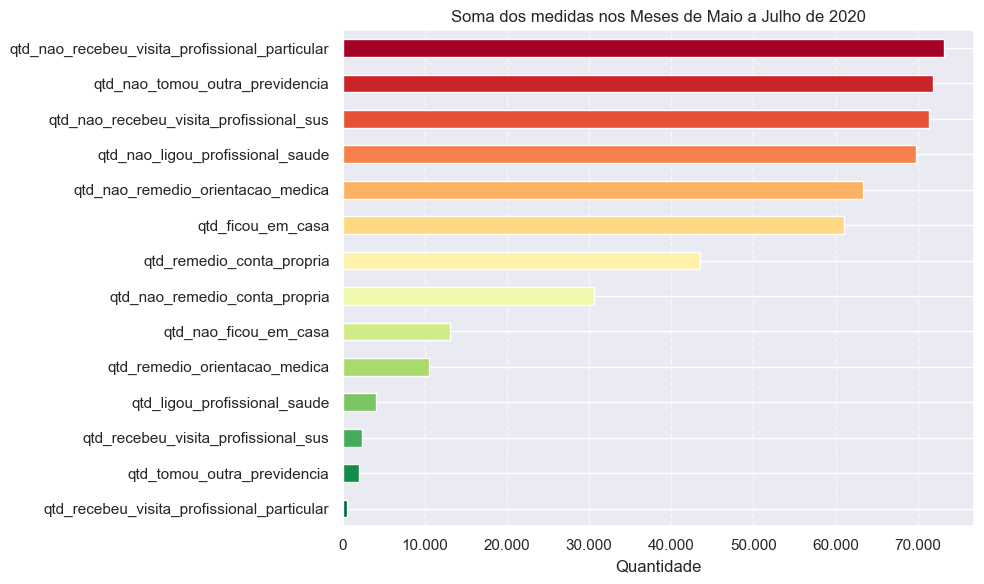

In [159]:
# Calcular a soma dos sintomas para cada mês
soma_medidas_por_mes = df[medidas].sum()
# Ordenar os medidas de forma crescente
soma_medidas_por_mes = soma_medidas_por_mes.sort_values()

# Criar um mapa de cores do Matplotlib do vermelho para o verde
cores = plt.cm.RdYlGn(np.linspace(1, 0, len(soma_medidas_por_mes)))

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
grafico = soma_medidas_por_mes.plot(kind='barh', color=cores)
plt.title('Soma dos medidas nos Meses de Maio a Julho de 2020')
plt.xlabel('Quantidade')
plt.ylabel('')

# Adicionar a legenda com os nomes dos medidas e suas respectivas cores
# handles = [plt.Rectangle((0,0),1,1, color=cores[i], ec="k") for i in range(len(medidas))]
# plt.legend(handles, soma_medidas_por_mes.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(',', '.')))

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Configura a grade no eixo X
plt.tight_layout()
plt.show()

# Inss

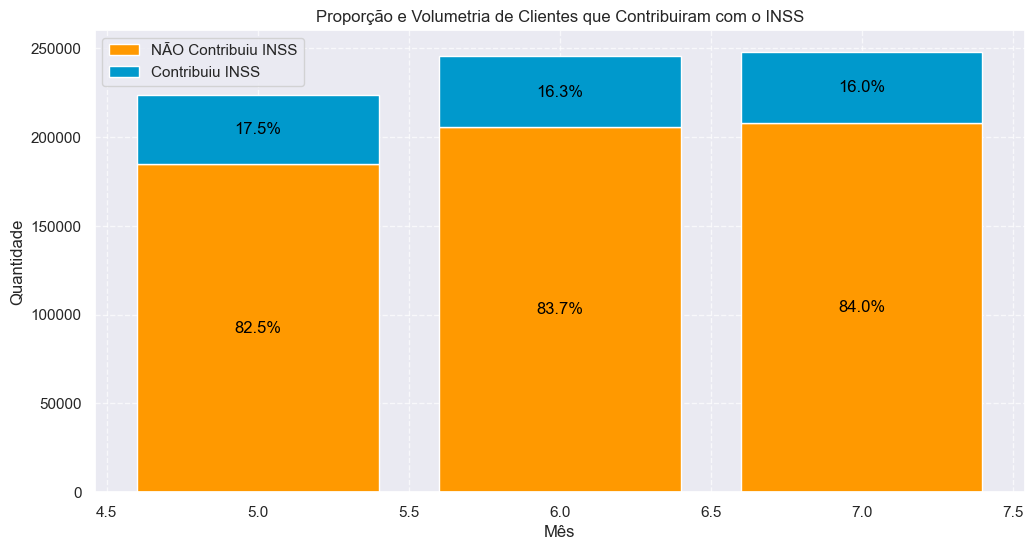

Mês 5:
  - Com Plano de Saúde: 17.54%
  - Sem Plano de Saúde: 82.46%
Mês 7:
  - Com Plano de Saúde: 16.04%
  - Sem Plano de Saúde: 83.96%
Mês 6:
  - Com Plano de Saúde: 16.30%
  - Sem Plano de Saúde: 83.70%


In [162]:
meses = df['MES']
qtd_com_plano_saude = df['Contribuiu_inss']
qtd_sem_plano_saude = df['Nao_Contribuiu_inss']

# Criar figura e eixos
plt.figure(figsize=(12, 6))

# Plotar gráfico de barras empilhadas
plt.bar(meses, qtd_sem_plano_saude, color='#ff9900', label='NÃO Contribuiu INSS')
plt.bar(meses, qtd_com_plano_saude, bottom=qtd_sem_plano_saude, color='#0099cc', label='Contribuiu INSS')

# Adicionar rótulos nas barras com percentuais
for i in range(len(meses)):
    total = qtd_com_plano_saude[i] + qtd_sem_plano_saude[i]
    
    # Cálculo dos percentuais
    percent_sem_plano = (qtd_sem_plano_saude[i] / total) * 100 if total > 0 else 0
    percent_com_plano = (qtd_com_plano_saude[i] / total) * 100 if total > 0 else 0
    
    # Posicionamento dos rótulos
    plt.text(meses[i], qtd_sem_plano_saude[i] / 2, f"{percent_sem_plano:.1f}%", ha='center', va='center', color='black')
    plt.text(meses[i], qtd_sem_plano_saude[i] + (qtd_com_plano_saude[i] / 2), f"{percent_com_plano:.1f}%", ha='center', va='center', color='black')

# Adicionar título e rótulos
plt.title('Proporção e Volumetria de Clientes que Contribuiram com o INSS')
plt.xlabel('Mês')
plt.ylabel('Quantidade')

# Adicionar legenda
plt.legend(loc='upper left')

# Adicionar grade de fundo
plt.grid(True, linestyle='--', alpha=0.7)

# Exibir gráfico
plt.show()

# Para visualizar a proporção percentual, podemos calcular e imprimir os valores
for i in range(len(meses)):
    total = qtd_com_plano_saude[i] + qtd_sem_plano_saude[i]
    percent_com_plano = (qtd_com_plano_saude[i] / total) * 100 if total > 0 else 0
    percent_sem_plano = (qtd_sem_plano_saude[i] / total) * 100 if total > 0 else 0
    
    print(f"Mês {meses[i]}:")
    print(f"  - Com Plano de Saúde: {percent_com_plano:.2f}%")
    print(f"  - Sem Plano de Saúde: {percent_sem_plano:.2f}%")


## HomeOffice

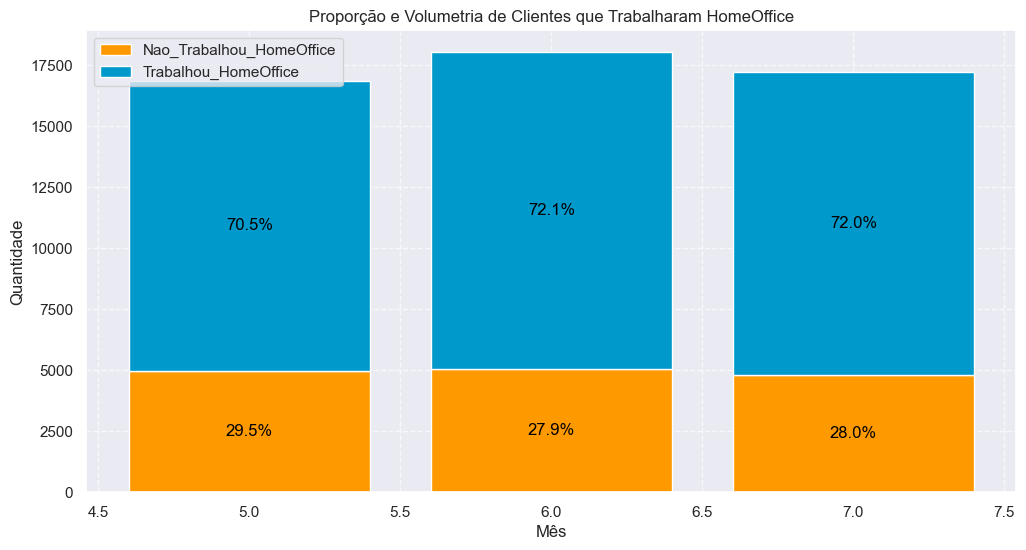

Mês 5:
  - Com Plano de Saúde: 70.49%
  - Sem Plano de Saúde: 29.51%
Mês 7:
  - Com Plano de Saúde: 72.03%
  - Sem Plano de Saúde: 27.97%
Mês 6:
  - Com Plano de Saúde: 72.06%
  - Sem Plano de Saúde: 27.94%


In [164]:
meses = df['MES']
qtd_com_plano_saude = df['Trabalhou_HomeOffice']
qtd_sem_plano_saude = df['Nao_Trabalhou_HomeOffice']

# Criar figura e eixos
plt.figure(figsize=(12, 6))

# Plotar gráfico de barras empilhadas
plt.bar(meses, qtd_sem_plano_saude, color='#ff9900', label='Nao_Trabalhou_HomeOffice')
plt.bar(meses, qtd_com_plano_saude, bottom=qtd_sem_plano_saude, color='#0099cc', label='Trabalhou_HomeOffice')

# Adicionar rótulos nas barras com percentuais
for i in range(len(meses)):
    total = qtd_com_plano_saude[i] + qtd_sem_plano_saude[i]
    
    # Cálculo dos percentuais
    percent_sem_plano = (qtd_sem_plano_saude[i] / total) * 100 if total > 0 else 0
    percent_com_plano = (qtd_com_plano_saude[i] / total) * 100 if total > 0 else 0
    
    # Posicionamento dos rótulos
    plt.text(meses[i], qtd_sem_plano_saude[i] / 2, f"{percent_sem_plano:.1f}%", ha='center', va='center', color='black')
    plt.text(meses[i], qtd_sem_plano_saude[i] + (qtd_com_plano_saude[i] / 2), f"{percent_com_plano:.1f}%", ha='center', va='center', color='black')

# Adicionar título e rótulos
plt.title('Proporção e Volumetria de Clientes que Trabalharam HomeOffice')
plt.xlabel('Mês')
plt.ylabel('Quantidade')

# Adicionar legenda
plt.legend(loc='upper left')

# Adicionar grade de fundo
plt.grid(True, linestyle='--', alpha=0.7)

# Exibir gráfico
plt.show()

# Para visualizar a proporção percentual, podemos calcular e imprimir os valores
for i in range(len(meses)):
    total = qtd_com_plano_saude[i] + qtd_sem_plano_saude[i]
    percent_com_plano = (qtd_com_plano_saude[i] / total) * 100 if total > 0 else 0
    percent_sem_plano = (qtd_sem_plano_saude[i] / total) * 100 if total > 0 else 0
    
    print(f"Mês {meses[i]}:")
    print(f"  - Com Plano de Saúde: {percent_com_plano:.2f}%")
    print(f"  - Sem Plano de Saúde: {percent_sem_plano:.2f}%")


## Recebeu_Auxilio

Recebeu_Auxilio





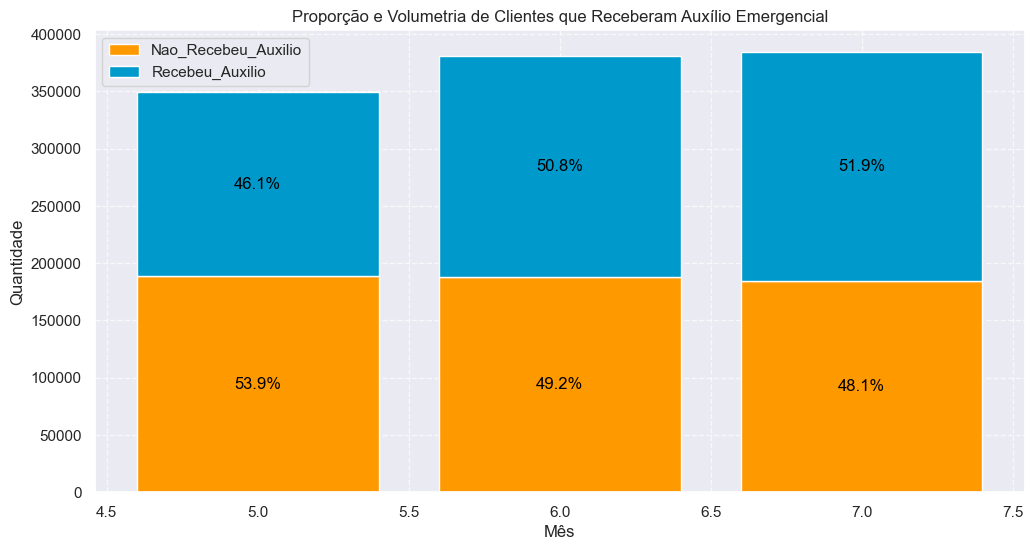

Mês 5:
  - Com Plano de Saúde: 46.05%
  - Sem Plano de Saúde: 53.95%
Mês 7:
  - Com Plano de Saúde: 51.93%
  - Sem Plano de Saúde: 48.07%
Mês 6:
  - Com Plano de Saúde: 50.80%
  - Sem Plano de Saúde: 49.20%


In [165]:
meses = df['MES']
qtd_com_plano_saude = df['Recebeu_Auxilio']
qtd_sem_plano_saude = df['Nao_Recebeu_Auxilio']

# Criar figura e eixos
plt.figure(figsize=(12, 6))

# Plotar gráfico de barras empilhadas
plt.bar(meses, qtd_sem_plano_saude, color='#ff9900', label='Nao_Recebeu_Auxilio')
plt.bar(meses, qtd_com_plano_saude, bottom=qtd_sem_plano_saude, color='#0099cc', label='Recebeu_Auxilio')

# Adicionar rótulos nas barras com percentuais
for i in range(len(meses)):
    total = qtd_com_plano_saude[i] + qtd_sem_plano_saude[i]
    
    # Cálculo dos percentuais
    percent_sem_plano = (qtd_sem_plano_saude[i] / total) * 100 if total > 0 else 0
    percent_com_plano = (qtd_com_plano_saude[i] / total) * 100 if total > 0 else 0
    
    # Posicionamento dos rótulos
    plt.text(meses[i], qtd_sem_plano_saude[i] / 2, f"{percent_sem_plano:.1f}%", ha='center', va='center', color='black')
    plt.text(meses[i], qtd_sem_plano_saude[i] + (qtd_com_plano_saude[i] / 2), f"{percent_com_plano:.1f}%", ha='center', va='center', color='black')

# Adicionar título e rótulos
plt.title('Proporção e Volumetria de Clientes que Receberam Auxílio Emergencial')
plt.xlabel('Mês')
plt.ylabel('Quantidade')

# Adicionar legenda
plt.legend(loc='upper left')

# Adicionar grade de fundo
plt.grid(True, linestyle='--', alpha=0.7)

# Exibir gráfico
plt.show()

# Para visualizar a proporção percentual, podemos calcular e imprimir os valores
for i in range(len(meses)):
    total = qtd_com_plano_saude[i] + qtd_sem_plano_saude[i]
    percent_com_plano = (qtd_com_plano_saude[i] / total) * 100 if total > 0 else 0
    percent_sem_plano = (qtd_sem_plano_saude[i] / total) * 100 if total > 0 else 0
    
    print(f"Mês {meses[i]}:")
    print(f"  - Com Plano de Saúde: {percent_com_plano:.2f}%")
    print(f"  - Sem Plano de Saúde: {percent_sem_plano:.2f}%")


## Trabalhou Semana Passada

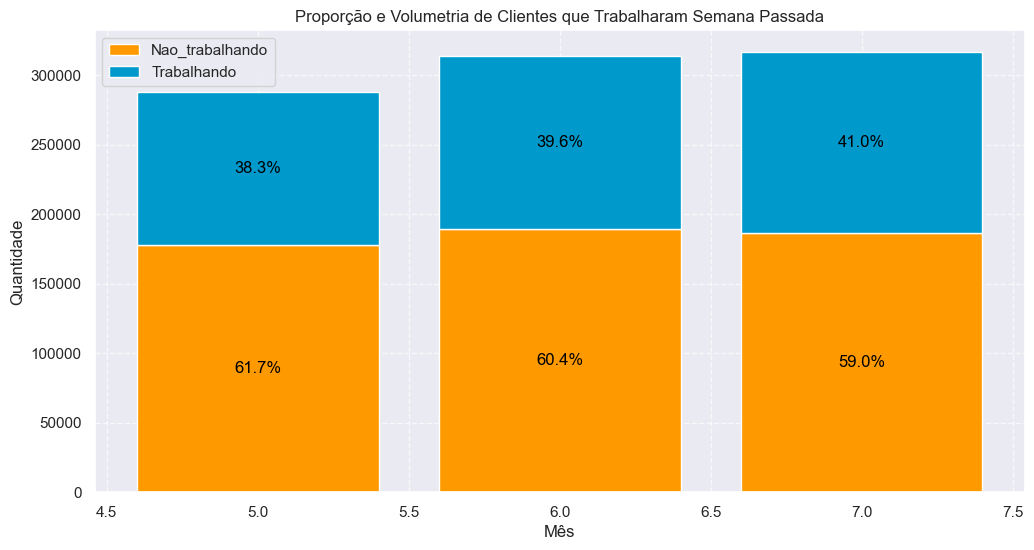

Mês 5:
  - Com Plano de Saúde: 38.29%
  - Sem Plano de Saúde: 61.71%
Mês 7:
  - Com Plano de Saúde: 41.02%
  - Sem Plano de Saúde: 58.98%
Mês 6:
  - Com Plano de Saúde: 39.63%
  - Sem Plano de Saúde: 60.37%


In [166]:
meses = df['MES']
qtd_com_plano_saude = df['Trabalhando']
qtd_sem_plano_saude = df['Nao_trabalhando']

# Criar figura e eixos
plt.figure(figsize=(12, 6))

# Plotar gráfico de barras empilhadas
plt.bar(meses, qtd_sem_plano_saude, color='#ff9900', label='Nao_trabalhando')
plt.bar(meses, qtd_com_plano_saude, bottom=qtd_sem_plano_saude, color='#0099cc', label='Trabalhando')

# Adicionar rótulos nas barras com percentuais
for i in range(len(meses)):
    total = qtd_com_plano_saude[i] + qtd_sem_plano_saude[i]
    
    # Cálculo dos percentuais
    percent_sem_plano = (qtd_sem_plano_saude[i] / total) * 100 if total > 0 else 0
    percent_com_plano = (qtd_com_plano_saude[i] / total) * 100 if total > 0 else 0
    
    # Posicionamento dos rótulos
    plt.text(meses[i], qtd_sem_plano_saude[i] / 2, f"{percent_sem_plano:.1f}%", ha='center', va='center', color='black')
    plt.text(meses[i], qtd_sem_plano_saude[i] + (qtd_com_plano_saude[i] / 2), f"{percent_com_plano:.1f}%", ha='center', va='center', color='black')

# Adicionar título e rótulos
plt.title('Proporção e Volumetria de Clientes que Trabalharam Semana Passada')
plt.xlabel('Mês')
plt.ylabel('Quantidade')

# Adicionar legenda
plt.legend(loc='upper left')

# Adicionar grade de fundo
plt.grid(True, linestyle='--', alpha=0.7)

# Exibir gráfico
plt.show()

# Para visualizar a proporção percentual, podemos calcular e imprimir os valores
for i in range(len(meses)):
    total = qtd_com_plano_saude[i] + qtd_sem_plano_saude[i]
    percent_com_plano = (qtd_com_plano_saude[i] / total) * 100 if total > 0 else 0
    percent_sem_plano = (qtd_sem_plano_saude[i] / total) * 100 if total > 0 else 0
    
    print(f"Mês {meses[i]}:")
    print(f"  - Com Plano de Saúde: {percent_com_plano:.2f}%")
    print(f"  - Sem Plano de Saúde: {percent_sem_plano:.2f}%")


## Afastado do Trabalho

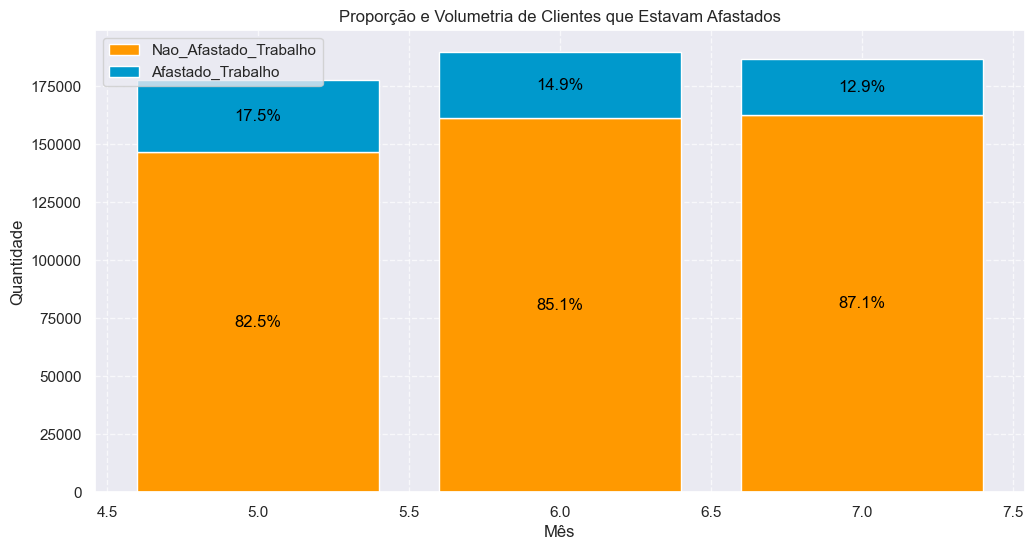

Mês 5:
  - Com Plano de Saúde: 17.49%
  - Sem Plano de Saúde: 82.51%
Mês 7:
  - Com Plano de Saúde: 12.86%
  - Sem Plano de Saúde: 87.14%
Mês 6:
  - Com Plano de Saúde: 14.92%
  - Sem Plano de Saúde: 85.08%


In [167]:
meses = df['MES']
qtd_com_plano_saude = df['Afastado_Trabalho']
qtd_sem_plano_saude = df['Nao_Afastado_Trabalho']

# Criar figura e eixos
plt.figure(figsize=(12, 6))

# Plotar gráfico de barras empilhadas
plt.bar(meses, qtd_sem_plano_saude, color='#ff9900', label='Nao_Afastado_Trabalho')
plt.bar(meses, qtd_com_plano_saude, bottom=qtd_sem_plano_saude, color='#0099cc', label='Afastado_Trabalho')

# Adicionar rótulos nas barras com percentuais
for i in range(len(meses)):
    total = qtd_com_plano_saude[i] + qtd_sem_plano_saude[i]
    
    # Cálculo dos percentuais
    percent_sem_plano = (qtd_sem_plano_saude[i] / total) * 100 if total > 0 else 0
    percent_com_plano = (qtd_com_plano_saude[i] / total) * 100 if total > 0 else 0
    
    # Posicionamento dos rótulos
    plt.text(meses[i], qtd_sem_plano_saude[i] / 2, f"{percent_sem_plano:.1f}%", ha='center', va='center', color='black')
    plt.text(meses[i], qtd_sem_plano_saude[i] + (qtd_com_plano_saude[i] / 2), f"{percent_com_plano:.1f}%", ha='center', va='center', color='black')

# Adicionar título e rótulos
plt.title('Proporção e Volumetria de Clientes que Estavam Afastados')
plt.xlabel('Mês')
plt.ylabel('Quantidade')

# Adicionar legenda
plt.legend(loc='upper left')

# Adicionar grade de fundo
plt.grid(True, linestyle='--', alpha=0.7)

# Exibir gráfico
plt.show()

# Para visualizar a proporção percentual, podemos calcular e imprimir os valores
for i in range(len(meses)):
    total = qtd_com_plano_saude[i] + qtd_sem_plano_saude[i]
    percent_com_plano = (qtd_com_plano_saude[i] / total) * 100 if total > 0 else 0
    percent_sem_plano = (qtd_sem_plano_saude[i] / total) * 100 if total > 0 else 0
    
    print(f"Mês {meses[i]}:")
    print(f"  - Com Plano de Saúde: {percent_com_plano:.2f}%")
    print(f"  - Sem Plano de Saúde: {percent_sem_plano:.2f}%")
